## Loading dataset

In [ ]:
# Loading dataset
import pandas as pd
google_sheet_url = 'https://docs.google.com/spreadsheets/d/1GxiYANrHyqFB9L6KkxypmS5KhbZen3Tm/edit#gid=548315443'
new_google_sheet_url = google_sheet_url.replace('edit#gid', 'export?format=csv&gid')
# new_google_sheet_url = 'https://docs.google.com/spreadsheets/d/1GxiYANrHyqFB9L6KkxypmS5KhbZen3Tm/export?format=csv&gid=548315443'
df=pd.read_csv(new_google_sheet_url)
df.head(2)

id_ответа       Раса       Пол Возраст      Статус курения  ECOG  \
0          1  Азиатская   Мужской   До 70   В настоящее время   0-1   
1          2  Азиатская   Мужской   До 70   В настоящее время   0-1   

  Есть опухолевая нагрузка? (симптомная опухоль) Ко-мутации KRAS  \
0                                             да              да   
1                                             да              да   

  Ко-мутации p53. Ко-мутации STK11  ... Срок от окончания ХЛТ  \
0              да               да  ...            до 42 дней   
1              да               да  ...      от 43 до 60 дней   

  Молекулярный статус (только для неплоскоклеточного рака)      PD-L1 статус  \
0                                        нет мутаций         Не исследовался   
1                                        нет мутаций         Не исследовался   

  Предпочтение пациента по ответу на терапию Ответ эксперта (Лактионов)  \
0                   Результативность лечения                 Дурвалумаб   
1                   Результативность лечения                 Дурвалумаб   

  Поставьте галочку, если уверены на 100%  Если 75%  Если 50%  \
0                                    True     False     False   
1                                    True     False     False   

   Альтернатива, если 50% - обязательно Комментарий  
0                                     0           0  
1                                     0           0  

[2 rows x 21 columns]

In [ ]:
# # Loading descision calc
# import pandas as pd
# google_sheet_url = 'https://docs.google.com/spreadsheets/d/1SH2MlcUbLQ7ygXqjv-1bCpZf1KIGa-hx/edit#gid=1270863294'
# new_google_sheet_url = google_sheet_url.replace('edit#gid', 'export?format=csv&gid')
# calc1=pd.read_csv(new_google_sheet_url)
# calc1.head(2)

In [ ]:
# # Loading descision calc
# import pandas as pd
# google_sheet_url = 'https://docs.google.com/spreadsheets/d/1SH2MlcUbLQ7ygXqjv-1bCpZf1KIGa-hx/edit#gid=501846118'
# new_google_sheet_url = google_sheet_url.replace('edit#gid', 'export?format=csv&gid')
# calc2=pd.read_csv(new_google_sheet_url)
# calc2.head(2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248832 entries, 0 to 248831
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count   Dtype 
---  ------                                                    --------------   ----- 
 0   id_ответа                                                 248832 non-null  int64 
 1   Раса                                                      248832 non-null  object
 2   Пол                                                       248832 non-null  object
 3   Возраст                                                   248832 non-null  object
 4   Статус курения                                            248832 non-null  object
 5   ECOG                                                      248832 non-null  object
 6   Есть опухолевая нагрузка? (симптомная опухоль)            248832 non-null  object
 7   Ко-мутации KRAS                                           248832 non-null  object
 8   Ко-мутации p53

##ydata-profiling

In [ ]:
pip install ydata-profiling

In [ ]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
profile=ProfileReport(df, title="df", html={'style':{'full_width': True}})

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df[df['Если 50%'] == True]['Комментарий'].unique()

array(['Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы',
       'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эффективность Осимертиниба ниже при 21 экзоне',
       'Возможна низкая эффективность Дурвалумаба, Алектиниб без доказательной базы',
       'Нет доказательной базы для назначения после перерыва >61 дня после ХЛТ',
       'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%',
       'Возможно есть мутации и эффективность Дурвалумаба будет низкой\n, Возможна низкая эффективность Дурвалумаба при PD-1 < 1%',
       'Возможно есть мутации и эффективность Дурвалумаба будет низкой'],
      dtype=object)

In [ ]:
df[df['Если 50%'] == True]['Альтернатива, если 50% - обязательно'].unique()

array(['Наблюдение', 'Осимертиниб', 'Дурвалумаб', 'Алектиниб'],
      dtype=object)

In [ ]:
df[df['Если 75%'] == True]['Комментарий'].unique()

array(['Нет доказательной базы для назначения после перерыва >61 дня после ХЛТ',
       'Возможно есть мутации и эффективность Дурвалумаба будет низкой',
       'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы',
       'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы, эффективность Осимертиниба ниже при 21 экзоне',
       'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%',
       'Возможна низкая эффективность Дурвалумаба при PD-1 < 1%, возможно есть активирующие мутации',
       'Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба',
       'Возможно есть мутации и эффективность Дурвалумаба будет низкой\n, Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба',
       'Возможно есть мутации и эффективность Дурвалумаба будет низкой\n, Возможна низкая эффективность Дурвалумаба при PD-1 < 1%',
       'Возможна низкая эффективность Дурвалумаба, Алектиниб без доказательной базы',

In [ ]:
df[df['Если 75%'] == True]['Альтернатива, если 50% - обязательно'].unique()

array(['Дурвалумаб', '0', 'Наблюдение', 'Осимертиниб', 'Алектиниб'],
      dtype=object)

In [ ]:
df[df['Поставьте галочку, если уверены на 100%'] == True]['Комментарий'].unique()

array(['0',
       'Возможна низкая эффективность Дурвалумаба, Осимертиниб без доказательной базы',
       'Нет доказательной базы для назначения после перерыва >61 дня после ХЛТ',
       'Вероятность 45% PD-L1 < 1% с потенциально низкой эффективностью Дурвалумаба'],
      dtype=object)

In [ ]:
df[df['Поставьте галочку, если уверены на 100%'] == True]['Альтернатива, если 50% - обязательно'].unique()

array(['0'], dtype=object)

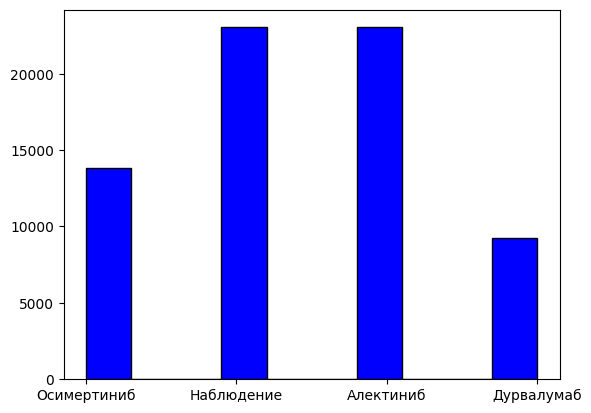

In [ ]:
import matplotlib.pyplot as plt
# figure, axis = plt.subplots(2, 2)

# Построение гистограммы
plt.hist(df[df['Если 50%'] == True]['Ответ эксперта (Лактионов)'], bins=10, color='blue', edgecolor='black')

# Отображение графика
plt.show()

In [ ]:
df[df['Комментарий'] == '0']['Ответ эксперта (Лактионов)'].unique()

array(['Дурвалумаб', 'Наблюдение'], dtype=object)

## Data preparing

In [ ]:
df[df['Комментарий'] == '0'].head(5)

id_ответа       Раса       Пол Возраст      Статус курения  ECOG  \
0           1  Азиатская   Мужской   До 70   В настоящее время   0-1   
1           2  Азиатская   Мужской   До 70   В настоящее время   0-1   
8           9  Азиатская   Мужской   До 70   В настоящее время   0-1   
17         18  Азиатская   Мужской   До 70   В настоящее время   0-1   
35         36  Азиатская   Мужской   До 70   В настоящее время   0-1   

   Есть опухолевая нагрузка? (симптомная опухоль) Ко-мутации KRAS  \
0                                              да              да   
1                                              да              да   
8                                              да              да   
17                                             да              да   
35                                             да              да   

   Ко-мутации p53. Ко-мутации STK11  ... Срок от окончания ХЛТ  \
0               да               да  ...            до 42 дней   
1               да               да  ...      от 43 до 60 дней   
8               да               да  ...          более 61 дня   
17              да               да  ...          более 61 дня   
35              да               да  ...          более 61 дня   

   Молекулярный статус (только для неплоскоклеточного рака)      PD-L1 статус  \
0                                         нет мутаций         Не исследовался   
1                                         нет мутаций         Не исследовался   
8                                 EGFR редкий вариант         Не исследовался   
17                                     ALK позитивный         Не исследовался   
35                                     ALK позитивный                Менее 1%   

   Предпочтение пациента по ответу на терапию Ответ эксперта (Лактионов)  \
0                    Результативность лечения                 Дурвалумаб   
1                    Результативность лечения                 Дурвалумаб   
8                    Результативность лечения                 Наблюдение   
17                   Результативность лечения                 Наблюдение   
35                   Результативность лечения                 Наблюдение   

   Поставьте галочку, если уверены на 100%  Если 75%  Если 50%  \
0                                     True     False     False   
1                                     True     False     False   
8                                     True     False     False   
17                                    True     False     False   
35                                    True     False     False   

    Альтернатива, если 50% - обязательно Комментарий  
0                                      0           0  
1                                      0           0  
8                                      0           0  
17                                     0           0  
35                                     0           0  

[5 rows x 21 columns]

In [ ]:
#function cretes confidence field
def confidence(field):
    if field['Поставьте галочку, если уверены на 100%'] == True:
      return 1
    if field['Если 75%'] == True:
      return 0.75
    if field['Если 50%'] == True:
      return 0.5
    else:
        return None


In [ ]:
df_copy = df.copy()

# add confidency column
df_copy['Уверенность'] = df_copy.apply(confidence, axis=1)

# drop odd columns
drop_column = ['id_ответа', 'Поставьте галочку, если уверены на 100%', 'Если 75%', 'Если 50%', 'Альтернатива, если 50% - обязательно', 'Комментарий']
df_copy = df_copy.drop(drop_column, axis=1)
df_copy.head()



Раса       Пол Возраст      Статус курения  ECOG  \
0  Азиатская   Мужской   До 70   В настоящее время   0-1   
1  Азиатская   Мужской   До 70   В настоящее время   0-1   
2  Азиатская   Мужской   До 70   В настоящее время   0-1   
3  Азиатская   Мужской   До 70   В настоящее время   0-1   
4  Азиатская   Мужской   До 70   В настоящее время   0-1   

  Есть опухолевая нагрузка? (симптомная опухоль) Ко-мутации KRAS  \
0                                             да              да   
1                                             да              да   
2                                             да              да   
3                                             да              да   
4                                             да              да   

  Ко-мутации p53. Ко-мутации STK11 Ко-мутации KEAP1 Срок от окончания ХЛТ  \
0              да               да               да            до 42 дней   
1              да               да               да      от 43 до 60 дней   
2              да               да               да          более 61 дня   
3              да               да               да            до 42 дней   
4              да               да               да      от 43 до 60 дней   

  Молекулярный статус (только для неплоскоклеточного рака)      PD-L1 статус  \
0                                        нет мутаций         Не исследовался   
1                                        нет мутаций         Не исследовался   
2                                        нет мутаций         Не исследовался   
3                                   не исследовались         Не исследовался   
4                                   не исследовались         Не исследовался   

  Предпочтение пациента по ответу на терапию Ответ эксперта (Лактионов)  \
0                   Результативность лечения                 Дурвалумаб   
1                   Результативность лечения                 Дурвалумаб   
2                   Результативность лечения                 Наблюдение   
3                   Результативность лечения                 Дурвалумаб   
4                   Результативность лечения                 Дурвалумаб   

   Уверенность  
0         1.00  
1         1.00  
2         0.75  
3         0.75  
4         0.75

In [ ]:
# creating target
df_copy['target'] = df_copy.iloc[:, -2:].apply(lambda x: ', conf -  '.join(map(str, x)), axis=1)
df_copy = df_copy.drop(['Ответ эксперта (Лактионов)', 'Уверенность'], axis=1)
df_copy.head(2)

Раса       Пол Возраст      Статус курения  ECOG  \
0  Азиатская   Мужской   До 70   В настоящее время   0-1   
1  Азиатская   Мужской   До 70   В настоящее время   0-1   

  Есть опухолевая нагрузка? (симптомная опухоль) Ко-мутации KRAS  \
0                                             да              да   
1                                             да              да   

  Ко-мутации p53. Ко-мутации STK11 Ко-мутации KEAP1 Срок от окончания ХЛТ  \
0              да               да               да            до 42 дней   
1              да               да               да      от 43 до 60 дней   

  Молекулярный статус (только для неплоскоклеточного рака)      PD-L1 статус  \
0                                        нет мутаций         Не исследовался   
1                                        нет мутаций         Не исследовался   

  Предпочтение пациента по ответу на терапию                   target  
0                   Результативность лечения  Дурвалумаб, conf -  1.0  
1                   Результативность лечения  Дурвалумаб, conf -  1.0

In [ ]:
unique_count = df_copy['target'].nunique()
print(f'Количество уникальных значений в столбце "target": {unique_count}')


Количество уникальных значений в столбце "target": 9


In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Преобразование меток классов в One-Hot Encoding
# df_matrix = pd.get_dummies(df_copy.iloc[:, :-1])

# correlation_matrix = df_matrix.corr()

# # Визуализируем матрицу корреляции с помощью Seaborn
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Матрица корреляции')
# plt.show()

## Autokeras section

In [ ]:
pip install autokeras


In [ ]:
pip install --upgrade keras_nlp

In [ ]:
# X,Y split

X = df_copy.drop(['target'], axis=1)
y = df_copy['target']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234)

In [ ]:
import autokeras as ak

# Инициализация классификатора AutoKeras
clf = ak.StructuredDataClassifier(
    max_trials=5,
    loss = 'binary_crossentropy',
    tuner = 'greedy',
    objective='val_accuracy',
    directory='NMIC',
    overwrite=True)

clf.fit(X_train, y_train, epochs=8, validation_data=(X_test, y_test))

Trial 5 Complete [00h 12m 31s]
val_accuracy: 1.0

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 59m 57s
Epoch 1/8
5444/5444 [==============================] - 41s 7ms/step - loss: 0.8876 - accuracy: 0.6610 - val_loss: 0.2789 - val_accuracy: 0.8990
Epoch 2/8
5444/5444 [==============================] - 42s 8ms/step - loss: 0.4039 - accuracy: 0.8271 - val_loss: 0.1390 - val_accuracy: 0.9504
Epoch 3/8
5444/5444 [==============================] - 40s 7ms/step - loss: 0.2873 - accuracy: 0.8770 - val_loss: 0.0930 - val_accuracy: 0.9842
Epoch 4/8
5444/5444 [==============================] - 37s 7ms/step - loss: 0.2201 - accuracy: 0.9094 - val_loss: 0.0662 - val_accuracy: 0.9773
Epoch 5/8
5444/5444 [==============================] - 37s 7ms/step - loss: 0.1864 - accuracy: 0.9233 - val_loss: 0.0431 - val_accuracy: 0.9969
Epoch 6/8
5444/5444 [==============================] - 41s 8ms/step - loss: 0.1631 - accuracy: 0.9318 - val_loss: 0.0297 - val_accuracy: 0.9997
Epoch 7/8
5444/5444 [===

In [ ]:
# Model evaluate
metrics = clf.evaluate(X_test, y_test)

2333/2333 [==============================] - 12s 5ms/step - loss: 0.0187 - accuracy: 1.0000


In [ ]:
# Test predict
# unseen_test = X_test.iloc[:50, :]
unseen_test = X_test
y_pred2 = clf.predict(unseen_test)
y_pred2


2333/2333 [==============================] - 10s 4ms/step


array([['Наблюдение, conf -  0.75'],
       ['Алектиниб, conf -  0.5'],
       ['Дурвалумаб, conf -  0.75'],
       ...,
       ['Дурвалумаб, conf -  1.0'],
       ['Алектиниб, conf -  0.5'],
       ['Наблюдение, conf -  1.0']], dtype='<U25')

In [ ]:

# Saving model
# clf.export_model().save('mnic_model.h5')

# Saving model 'tf' format
# clf.export_model().save('mnic_model_v2', save_format='tf')

# Saving model 'Keras' format
# model = clf.export_model()
# model.save('model.keras')
# model.summary()
from tensorflow.keras.models import load_model
loaded_model = load_model('model.keras')





In [ ]:
import os
import zipfile

# Путь к папке, которую вы хотите скачать
folder_path = '/content/NMIC/structured_data_classifier/best_model'

# Имя zip-файла, который будет создан
zip_name = 'best_model.zip'

# Создание zip-файла из папки
with zipfile.ZipFile(zip_name, 'w') as zipf:
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Создание относительных путей для файлов, чтобы структура папок сохранялась
            zipf.write(os.path.join(root, file),
                       os.path.relpath(os.path.join(root, file),
                                       os.path.join(folder_path, '..')))


from google.colab import files
files.download('best_model.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# !zip -r /content/file.zip /content/structured_data_classifier
from google.colab import files
files.download('/content/model.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Loading model
# import tensorflow as tf

model_path = '/content/mnic_model_v2'
# loaded_model = tf.keras.models.load_model(model_path)
loaded_model = tf.keras.models.load_model('mnic_model_v2', custom_objects=ak.CUSTOM_OBJECTS)

In [ ]:
# Test predict
X_new = X_test.iloc[:2, :]
predictions = loaded_model.predict(X_new)
predictions



NameError: ignored

In [ ]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 14)]              0         
                                                                 
 multi_category_encoding (M  (None, 14)                0         
 ultiCategoryEncoding)                                           
                                                                 
 dense (Dense)               (None, 256)               3840      
                                                                 
 re_lu (ReLU)                (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 32)                8224      
                                                                 
 re_lu_1 (ReLU)              (None, 32)                0         
                                                             

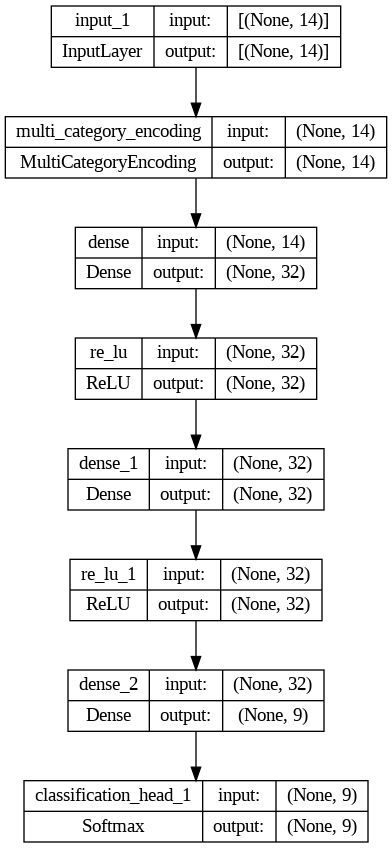

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


## ML section

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoded_data = pd.get_dummies(df)

In [ ]:
# label_encoder = preprocessing.LabelEncoder()
# label_encoder.fit(df_copy['Раса'])
# # finding the unique classes
# print(list(label_encoder.classes_))
# print()

# # values after transforming the categorical column.
# print(label_encoder.transform(df_copy['Раса']))

# df_copy['Раса'] = label_encoder.fit_transform(df_copy['Раса'])

In [ ]:
# X,Y split
from sklearn.model_selection import train_test_split

# X = df_copy.drop(['target'], axis=1)
# y = df_copy['target']

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234)

In [ ]:
# Initialize the OneHotEncoder
# Fit and transform the target variable (y_train) using one-hot encoding
df_encoded = pd.get_dummies(df_copy.iloc[:, :-1])

# Add target
df_encoded['target'] = df_copy.iloc[:, -1]

df_encoded.head()

Раса_Азиатская  Раса_Другая  Раса_Европейская  Пол_ Женский  Пол_ Мужской  \
0               1            0                 0             0             1   
1               1            0                 0             0             1   
2               1            0                 0             0             1   
3               1            0                 0             0             1   
4               1            0                 0             0             1   

   Возраст_ >70  Возраст_ До 70  Статус курения_ В настоящее время  \
0             0               1                                  1   
1             0               1                                  1   
2             0               1                                  1   
3             0               1                                  1   
4             0               1                                  1   

   Статус курения_ Курение в прошлом (бросил более 1 года)  \
0                                                  0         
1                                                  0         
2                                                  0         
3                                                  0         
4                                                  0         

   Статус курения_ Курение в прошлом (бросил более 1 месяца до 1 года)  ...  \
0                                                  0                    ...   
1                                                  0                    ...   
2                                                  0                    ...   
3                                                  0                    ...   
4                                                  0                    ...   

   Молекулярный статус (только для неплоскоклеточного рака)_ EGFR ex21  \
0                                                  0                     
1                                                  0                     
2                                                  0                     
3                                                  0                     
4                                                  0                     

   Молекулярный статус (только для неплоскоклеточного рака)_ EGFR редкий вариант  \
0                                                  0                               
1                                                  0                               
2                                                  0                               
3                                                  0                               
4                                                  0                               

   Молекулярный статус (только для неплоскоклеточного рака)_ не исследовались  \
0                                                  0                            
1                                                  0                            
2                                                  0                            
3                                                  1                            
4                                                  1                            

   Молекулярный статус (только для неплоскоклеточного рака)_ нет мутаций  \
0                                                  1                       
1                                                  1                       
2                                                  1                       
3                                                  0                       
4                                                  0                       

   PD-L1 статус_ Более 1%  PD-L1 статус_ Менее 1%  \
0                       0                       0   
1                       0                       0   
2                       0                       0   
3                       0                       0   
4                       0                       0   

   PD-L1 статус_ Не исследовался  \
0   

In [ ]:
X = df_encoded.iloc[:, :-1]  # Используем все столбцы, кроме последнего, как признаки
y = df_encoded.iloc[:, -1]  # Последний столбец - целевая переменная



In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create the LabelEncoder instance
encoder = LabelEncoder()

# Fit the encoder to the training labels
encoder.fit(y)

# Transform both the training and test labels
# y_train_encoded = encoder.fit_transform(y_train)
y = encoder.transform(y)

# X = df_copy.drop(['target'], axis=1)
# y = df_copy['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=1234)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# Example data
data = df_copy.iloc[:, -1].to_numpy().reshape(-1, 1)

# Create the encoder
encoder = OneHotEncoder(sparse=False) # sparse=False to return a numpy array

# Fit and transform the data
data_encoded = encoder.fit_transform(data)

print(data_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = encoder.transform(np.array(y_test).reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
# Вывод информации о данных после One Hot Encoding
print("Информация о данных после One Hot Encoding:")
print("Количество столбцов:", df_encoded.shape[1])
print("Уникальные значения в каждом столбце:")
for column in df_encoded.columns:
    unique_values = df_encoded[column].unique()
    num_unique_values = len(unique_values)
    print(f"Столбец '{column}': {num_unique_values} уникальных значений")

Информация о данных после One Hot Encoding:
Количество столбцов: 37
Уникальные значения в каждом столбце:
Столбец 'Раса_Азиатская': 2 уникальных значений
Столбец 'Раса_Другая': 2 уникальных значений
Столбец 'Раса_Европейская': 2 уникальных значений
Столбец 'Пол_ Женский': 2 уникальных значений
Столбец 'Пол_ Мужской': 2 уникальных значений
Столбец 'Возраст_ >70': 2 уникальных значений
Столбец 'Возраст_ До 70': 2 уникальных значений
Столбец 'Статус курения_ В настоящее время': 2 уникальных значений
Столбец 'Статус курения_ Курение в прошлом (бросил более 1 года)': 2 уникальных значений
Столбец 'Статус курения_ Курение в прошлом (бросил более 1 месяца до 1 года)': 2 уникальных значений
Столбец 'ECOG_ 0-1': 2 уникальных значений
Столбец 'ECOG_2': 2 уникальных значений
Столбец 'Есть опухолевая нагрузка? (симптомная опухоль)_ да': 2 уникальных значений
Столбец 'Есть опухолевая нагрузка? (симптомная опухоль)_ нет': 2 уникальных значений
Столбец 'Ко-мутации KRAS_ да': 2 уникальных значений
Сто

# RF classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
# Generate a classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Classification Report:
                            precision    recall  f1-score   support

   Алектиниб, conf -  0.5       1.00      1.00      1.00      6837
  Дурвалумаб, conf -  0.5       1.00      1.00      1.00      2763
 Дурвалумаб, conf -  0.75       1.00      1.00      1.00      6204
  Дурвалумаб, conf -  1.0       1.00      1.00      1.00      4177
  Наблюдение, conf -  0.5       1.00      1.00      1.00      6949
 Наблюдение, conf -  0.75       1.00      1.00      1.00     12412
  Наблюдение, conf -  1.0       1.00      1.00      1.00     22673
 Осимертиниб, conf -  0.5       1.00      1.00      1.00      4197
Осимертиниб, conf -  0.75       1.00      1.00      1.00      8438

                 accuracy                           1.00     74650
                macro avg       1.00      1.00      1.00     74650
             weighted avg       1.00      1.00      1.00     74650



# Tensorflow keras classification

In [ ]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout


In [ ]:
#Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(14,'Score'))  #print 10 best features

In [ ]:
X = X[featureScores.iloc[:, 0]]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
# # Assuming df is your DataFrame
# X = df.drop('label', axis=1)  # Features
# y = df['label']  # Target variable

# # Split the dataset into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Create the Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(9, activation='softmax')  # 'sigmoid' or 'softmax' for multi-class classification
])


In [ ]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Use 'categorical_crossentropy' for multi-class


In [ ]:
# Train the Model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)


Epoch 1/25
4355/4355 [==============================] - 15s 3ms/step - loss: 0.2661 - accuracy: 0.9060 - val_loss: 7.9438e-04 - val_accuracy: 1.0000
Epoch 2/25
4355/4355 [==============================] - 11s 3ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 3.7604e-05 - val_accuracy: 1.0000
Epoch 3/25
4355/4355 [==============================] - 10s 2ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 5.8237e-06 - val_accuracy: 1.0000
Epoch 4/25
4355/4355 [==============================] - 13s 3ms/step - loss: 0.0161 - accuracy: 0.9945 - val_loss: 3.7375e-06 - val_accuracy: 1.0000
Epoch 5/25
4355/4355 [==============================] - 11s 3ms/step - loss: 0.0140 - accuracy: 0.9951 - val_loss: 4.7693e-06 - val_accuracy: 1.0000
Epoch 6/25
4355/4355 [==============================] - 12s 3ms/step - loss: 0.0127 - accuracy: 0.9958 - val_loss: 9.0788e-07 - val_accuracy: 1.0000
Epoch 7/25
4355/4355 [==============================] - 12s 3ms/step - loss: 0.0131 - accuracy: 0.9959 - v

In [ ]:
# Evaluate the Model:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: ", accuracy)

2333/2333 [==============================] - 4s 2ms/step - loss: 1.6944e-08 - accuracy: 1.0000
Test Accuracy:  1.0


In [ ]:
# Make Predictions:
predictions = model.predict(X_test)

2333/2333 [==============================] - 3s 1ms/step
